#Actvidad Evaluación Final Módulo 7

Descripción del ejercicio

Tu primer proyecto de Deep Learning en Python con Keras paso a paso.

Cree un nuevo archivo llamado
Mi_primera_red_keras_NOMBRE1_APELLIDO1_NOMBRE2_APELLIDO2.ipynb (.py). Adjunto encontrará la base de datos y los detalles del set de datos.

#Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

Usted debe hacer lo siguiente:
#1. Cargue las librerías que necesita

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.utils import to_categorical
from keras.models import Model

import matplotlib.pyplot as plt

In [2]:
def probar_rn(X, y, hidden1, hidden2, ep, batchsize):
  """
  funcion prueba red neuronal con hiperparametros
  input: capa1, capa2, salida
  output: accuracy
  """
  inputs = Input(shape=(8,))

  dense_layer1 = Dense(hidden1, activation='relu')(inputs)
  dense_layer2 = Dense(hidden2, activation='relu')(dense_layer1)
  # caso de analisis de clasificación binaria
# En estos casos la red neuronal tendrá también una única neurona de salida que -si estamos
# usando neuronas sigmoideas- devolverá un valor entre 0 y 1, valor que convertiremos en una
# clase suponiendo que cualquier valor mayor o igual a 0.5, por ejemplo, deberá interpretarse
# como "clase 0" y cualquier valor menor a 0.5 deberá interpretarse como "clase 1"
# (o maligno y benigno, etc.).
  outputs = Dense(1, activation='sigmoid')(dense_layer2)

  model_f = Model(inputs=inputs, outputs=outputs)
  model_f.compile(
      optimizer='adam',
      loss='BinaryFocalCrossentropy',
      metrics=['accuracy']
  )
  # entrenando el modelo
  history = model_f.fit(
                      X, # datos de entreda
                      y, # predicción
                      validation_split=0.2, # split train y test
                      epochs=ep, # veces que actualiza los pesos en la retropropagación
                      batch_size=batchsize, # no pasa todos los registros de una vez sino en lotes de 10 hasta completa una epoca
                      verbose=0
                      )

  print(f"Accuracy: {(history.history['accuracy'][-1]* 100):.2f} %")


#2. Importe la base de datos pima-indians-diabetes.csv

In [3]:
columnas=['preg','plas','pres','skin','test','mass','pedi','age','clase']

In [4]:
df=pd.read_csv('pima-indians-diabetes.csv', names=columnas)

#3. Defina la Base de datos, incluyendo medidas descriptivas y las variables que posee (puede usar las data .names). Considere que la variable de salida (y) es 0,1.

In [5]:
# evalua la dispersión de la variable objetivo
df.clase.value_counts()

0    500
1    268
Name: clase, dtype: int64

In [6]:
# la mayoría de los datos definen test negativo de diabetes

In [7]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,clase
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   clase   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
clase    0
dtype: int64

In [10]:
# no se observan valores nulos o faltantes

In [11]:
X = df.drop('clase', axis=1)
y = df.clase

In [12]:
# preprocesamiento para normalizar valores
X=X/X.max()

In [13]:
# caso de analisis de clasificación binaria
# En estos casos la red neuronal tendrá también una única neurona de salida que -si estamos
# usando neuronas sigmoideas- devolverá un valor entre 0 y 1, valor que convertiremos en una
# clase suponiendo que cualquier valor mayor o igual a 0.5, por ejemplo, deberá interpretarse
# como "clase 0" y cualquier valor menor a 0.5 deberá interpretarse como "clase 1"
# (o maligno y benigno, etc.).
# si fuera multiclase aplicaria One-hot encode target, quedando y = to_categorical(y)

#4. Defina el modelo Keras

In [14]:
model = Sequential()

#5. Utilice la función de activación de la unidad lineal rectificada denominada ReLU en las dos primeras capas y la función Sigmoid en la capa de salida.

In [15]:
# primera capa
# los 256 perceptrones estaran asociados a (256+1) 257 pesos (W) y
# hay 8 valores o elementos de entreda que estaran conectadas a esos perceptrones
model.add(Dense(256, activation='relu', input_dim=X.shape[1]))
model.add(Dense(128, activation='relu'))
# Hay 2 classes en el target para la capa de salida
# se requiere 1 neurona de salida por ser clasificación binaria
model.add(Dense(1, activation='sigmoid'))

#6. Compile el modelo Keras

In [16]:
model.compile(
    optimizer='adam',  # algoritmo que optimiza los pesos de cada una de las neuronas
    # Binary cross-entropy loss is often used for binary (0 or 1) classification tasks
    loss='BinaryFocalCrossentropy',  # función de pérdida que utilizará el optimizador durante la retropropagación
    metrics=['accuracy','mse'] # métricas
)

In [17]:
# visualiza arquitectura o detalles del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35,329
Trainable params: 35,329
Non-trainable params: 0
_________________________________________________________________


#7. Ajuste el modelo, considere epochs=150, batch_size=10

In [18]:
# entrenando el modelo
history = model.fit(
                    X, # datos de entreda
                    y, # target
                    validation_split=0.2, # split train y test
                    epochs=150, # veces que actualiza los pesos en la retropropagación
                    batch_size=10, # no pasa todos los registros de una vez sino en lotes de 10 hasta completa una epoca
                    verbose=0
                    )

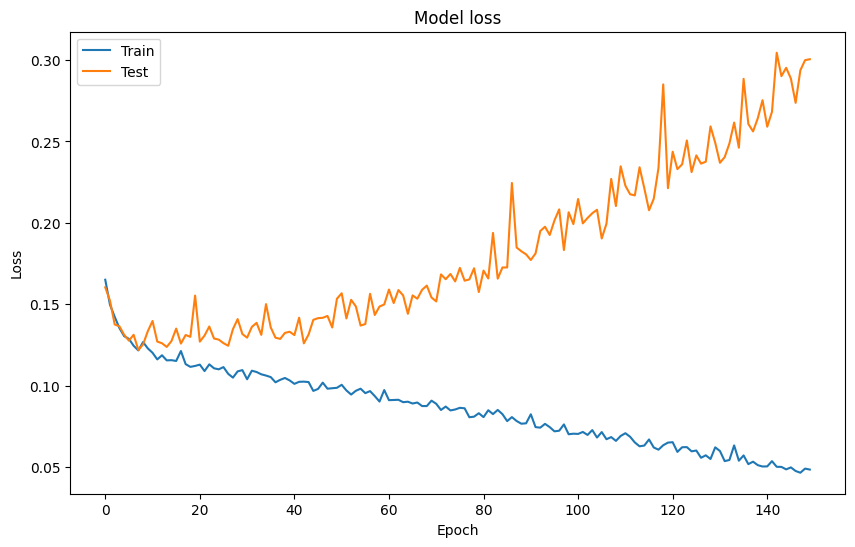

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(history.history['loss'], label='Train')
ax.plot(history.history['val_loss'], label='Test')
ax.set_title('Model loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(loc='upper left')
plt.show()

#8. Evalúe el accuracy de su modelo.

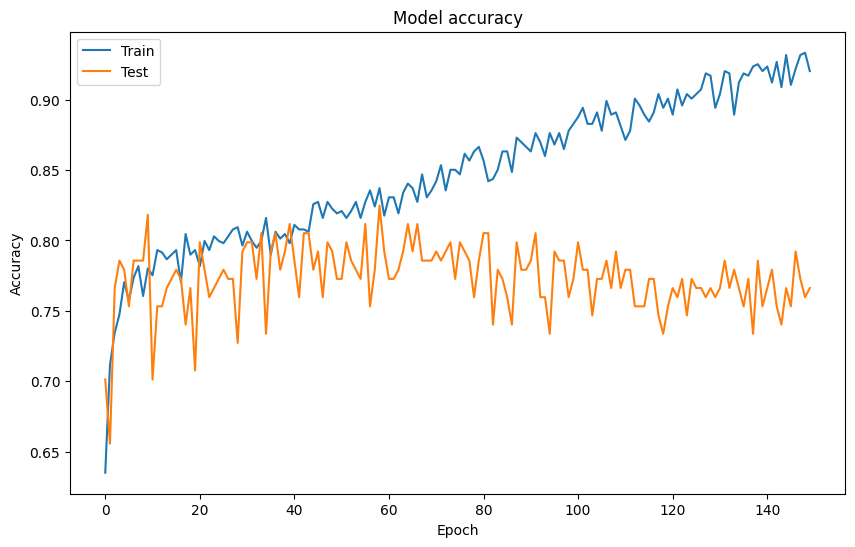

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(history.history['accuracy'], label='Train')
ax.plot(history.history['val_accuracy'], label='Test')
ax.set_title('Model accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(loc='upper left')

In [21]:
print(f"Accuracy: {(history.history['accuracy'][-1]* 100):.2f} %")

Accuracy: 92.02 %


#8.1 Comente.

In [22]:
# El modelo esta generalizando bien, porque el accuracy (test) no es 1 y se muestra por debajo del training set, es decir, no
# sobreajustó los datos (overfitting), por lo que es esperable que la varianza de los datos de prueba (datos que no conoce) sea mayor
# que la varianza que se obtuvieron durante el entrenamiento.

In [23]:
# Inicialmente definí el número de perceptrones en 256 y 128 para obtener un resultado preliminar del accuracy.
# Al probar variando el número de perceptrones, épocas y tamaño de batch el accuracy varía pero sigue generalizando bien.

#probando versión funcional (variando hiperparámetros).

In [24]:
# capa 1: 256, capa 2: 128, épocas: 100, batch: 10
probar_rn(X, y, 256, 128, 50, 32)

Accuracy: 80.94 %


In [25]:
# capa 1: 256, capa 2: 128, épocas: 50, batch: 10
probar_rn(X, y, 256, 128, 50, 10)

Accuracy: 82.57 %


In [26]:
# capa 1: 256, capa 2: 128, épocas: 150, batch: 32
probar_rn(X, y, 256, 128, 150, 32)

Accuracy: 85.67 %


In [27]:
# capa 1: 128, capa 2: 64, épocas: 150, batch: 10
probar_rn(X, y, 128, 64, 150, 10)

Accuracy: 86.48 %


In [28]:
# capa 1: 128, capa 2: 64, épocas: 50, batch: 32
probar_rn(X, y, 128, 64, 50, 32)

Accuracy: 80.13 %


# En definitiva es posible mejorar el accuracy realizando ajustes de los hiperparámetros que sean necesarios sin caer en el sobreajuste de los datos.